[![preview notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PyMPDATA/blob/main/examples/PyMPDATA_examples/DPDC/demo.ipynb)
[![launch on mybinder.org](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PyMPDATA.git/main?urlpath=lab/tree/examples/PyMPDATA_examples/DPDC/demo.ipynb)
[![launch on Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PyMPDATA/blob/main/examples/PyMPDATA_examples/DPDC/demo.ipynb)

demo of the [Double Pass Donor Cell](https://www.osti.gov/servlets/purl/7049237) variant of MPDATA

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PyMPDATA-examples')

In [2]:
import numpy as np
from matplotlib import pyplot

from PyMPDATA import Options, Stepper, Solver
from PyMPDATA import ScalarField, VectorField
from PyMPDATA.boundary_conditions import Periodic

from open_atmos_jupyter_utils import show_plot

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 7, 10

In [4]:
def analytical_solution(psi_0,x_start,x_end,dt,nt,v):
    p = ((x-v*nt*dt - x_start) % (x_end-x_start) )+ x_start
    return psi_0(p)

In [5]:
def psi_0(x):
    a = 5
    return 8*a**3 / (x**2 + 4*a**2)

nx = 100
x_start = - 100
x_end = 100
dx = (x_end - x_start)/nx
x  = np.arange(-100, 100, dx)
dt = 1
nt = 1000
v = -1

In [6]:
optionsDPDC = Options(n_iters=2, DPDC=True)
stepperDPDC = Stepper(options=optionsDPDC, grid=(nx,))
optionsMPDATA_1 = Options(n_iters=2, DPDC=False)
stepperMPDATA_1 = Stepper(options=optionsMPDATA_1, grid=(nx,))
optionsMPDATA_2 = Options(n_iters=3, DPDC=False)
stepperMPDATA_2 = Stepper(options=optionsMPDATA_2, grid=(nx,))
optionsMPDATA_3 = Options(n_iters=4, DPDC=False)
stepperMPDATA_3 = Stepper(options=optionsMPDATA_3, grid=(nx,))

In [7]:
halo = optionsDPDC.n_halo
advecteeDPDC = ScalarField(
    data=psi_0(x), 
    halo=halo, 
    boundary_conditions=(Periodic(),)
)
advector = VectorField(
    data=(np.full(nx+1, v*dt/dx),),
    halo=halo,
    boundary_conditions=(Periodic(),)
)
advecteeMPDATA_1 = ScalarField(
    data=psi_0(x), 
    halo=halo, 
    boundary_conditions=(Periodic(),)
)
advecteeMPDATA_2 = ScalarField(
    data=psi_0(x), 
    halo=halo, 
    boundary_conditions=(Periodic(),)
)
advecteeMPDATA_3 = ScalarField(
    data=psi_0(x), 
    halo=halo, 
    boundary_conditions=(Periodic(),)
)

In [8]:
solverDPDC = Solver(stepper=stepperDPDC, advectee=advecteeDPDC, advector=VectorField.clone(advector))
solverMPDATA_1 = Solver(stepper=stepperMPDATA_1, advectee=advecteeMPDATA_1, advector=VectorField.clone(advector))
solverMPDATA_2 = Solver(stepper=stepperMPDATA_2, advectee=advecteeMPDATA_2, advector=VectorField.clone(advector))
solverMPDATA_3 = Solver(stepper=stepperMPDATA_3, advectee=advecteeMPDATA_3, advector=VectorField.clone(advector))
solverMPDATA_1.advance(nt)
solverMPDATA_2.advance(nt)
solverMPDATA_3.advance(nt)
solverDPDC.advance(nt)
true_solution = analytical_solution(psi_0,x_start,x_end,dt,nt,v)

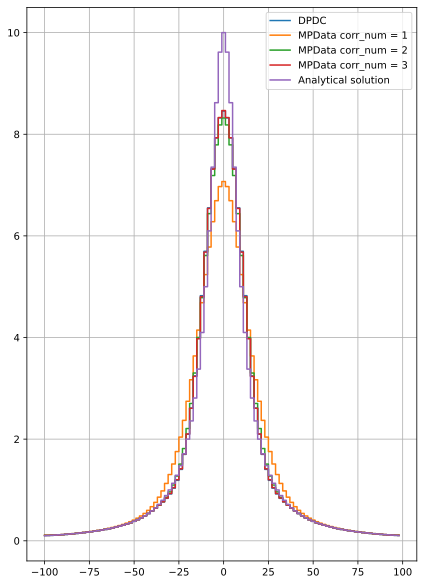

In [9]:
pyplot.step(x, solverDPDC.advectee.get(),label="DPDC" ,where='mid')
pyplot.step(x, solverMPDATA_1.advectee.get(),label="MPData corr_num = 1" ,where='mid')
pyplot.step(x, solverMPDATA_2.advectee.get(),label="MPData corr_num = 2" ,where='mid')
pyplot.step(x, solverMPDATA_3.advectee.get(),label="MPData corr_num = 3" ,where='mid')
pyplot.step(x, true_solution,label="Analytical solution" ,where='mid')
pyplot.grid()
pyplot.legend()
show_plot()

Error plot: Analytical - Numerical solution


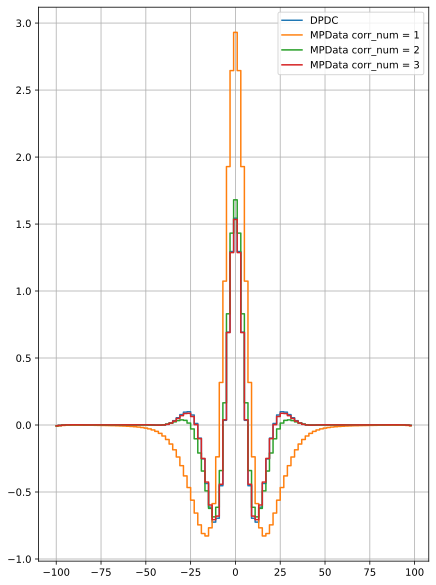

In [10]:
print("Error plot: Analytical - Numerical solution")
pyplot.step(x,true_solution - solverDPDC.advectee.get(),label="DPDC" ,where='mid')
pyplot.step(x,true_solution - solverMPDATA_1.advectee.get(),label="MPData corr_num = 1" ,where='mid')
pyplot.step(x,true_solution - solverMPDATA_2.advectee.get(),label="MPData corr_num = 2" ,where='mid')
pyplot.step(x,true_solution - solverMPDATA_3.advectee.get(),label="MPData corr_num = 3" ,where='mid')
pyplot.grid()
pyplot.legend()
show_plot()

In [11]:
def psi_1(x):
    return abs(x)**(1/2)/10
x_start = - 100
x_end =   100
x  = np.arange(-100, 100, dx)
dx = 2
dt = 1
nt = 1000
v = - 1

In [12]:
optionsDPDC = Options(n_iters=2, DPDC=True)
stepperDPDC = Stepper(options=optionsDPDC, grid=(nx,))
optionsMPDATA_1 = Options(n_iters=2, DPDC=False,infinite_gauge = True)
stepperMPDATA_1 = Stepper(options=optionsMPDATA_1, grid=(nx,))
optionsMPDATA_2 = Options(n_iters=3, DPDC=False)
stepperMPDATA_2 = Stepper(options=optionsMPDATA_2, grid=(nx,))
optionsMPDATA_3 = Options(n_iters=4, DPDC=False)
stepperMPDATA_3 = Stepper(options=optionsMPDATA_3, grid=(nx,))
halo = optionsDPDC.n_halo
advecteeDPDC = ScalarField(
    data=psi_1(x), 
    halo=halo, 
    boundary_conditions=(Periodic(),)
)
advector = VectorField(
    data=(np.full(nx+1, v*dt/dx),),
    halo=halo,
    boundary_conditions=(Periodic(),)
)
advecteeMPDATA_1 = ScalarField(
    data=psi_1(x), 
    halo=halo, 
    boundary_conditions=(Periodic(),)
)
advecteeMPDATA_2 = ScalarField(
    data=psi_1(x), 
    halo=halo, 
    boundary_conditions=(Periodic(),)
)
advecteeMPDATA_3 = ScalarField(
    data=psi_1(x), 
    halo=halo, 
    boundary_conditions=(Periodic(),)
)

In [13]:
solverDPDC = Solver(stepper=stepperDPDC, advectee=advecteeDPDC, advector=advector)
solverMPDATA_1 = Solver(stepper=stepperMPDATA_1, advectee=advecteeMPDATA_1, advector=VectorField.clone(advector))
solverMPDATA_2 = Solver(stepper=stepperMPDATA_2, advectee=advecteeMPDATA_2, advector=VectorField.clone(advector))
solverMPDATA_3 = Solver(stepper=stepperMPDATA_3, advectee=advecteeMPDATA_3, advector=VectorField.clone(advector))
solverMPDATA_1.advance(nt)
solverMPDATA_2.advance(nt)
solverMPDATA_3.advance(nt)
solverDPDC.advance(nt)
true_solution = analytical_solution(psi_1,x_start,x_end,dt,nt,v)

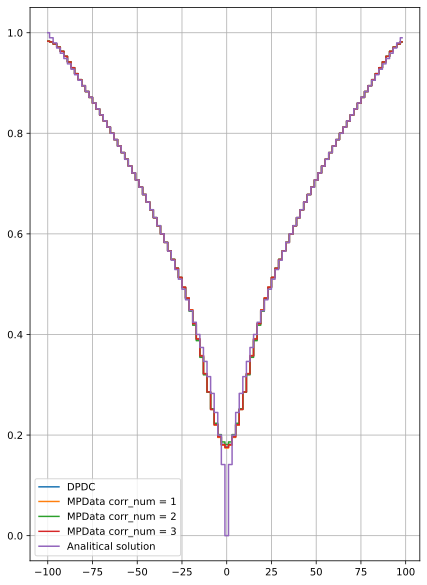

In [14]:
pyplot.step(x, solverDPDC.advectee.get(),label="DPDC" ,where='mid')
pyplot.step(x, solverMPDATA_1.advectee.get(),label="MPData corr_num = 1" ,where='mid')
pyplot.step(x, solverMPDATA_2.advectee.get(),label="MPData corr_num = 2" ,where='mid')
pyplot.step(x, solverMPDATA_3.advectee.get(),label="MPData corr_num = 3" ,where='mid')
pyplot.step(x, true_solution, label="Analitical solution" ,where='mid')
pyplot.grid()
pyplot.legend()
show_plot()

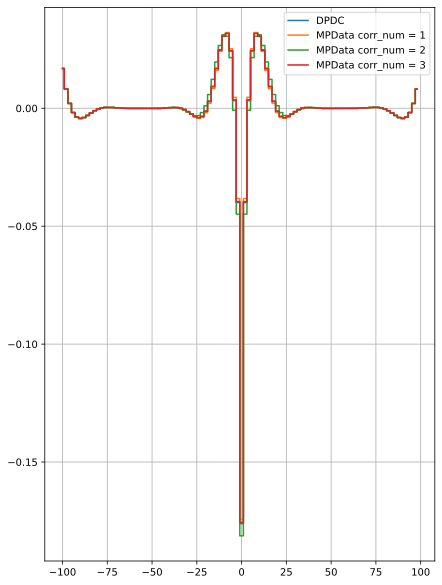

In [15]:
pyplot.step(x,true_solution - solverDPDC.advectee.get(),label="DPDC" ,where='mid')
pyplot.step(x,true_solution - solverMPDATA_1.advectee.get(),label="MPData corr_num = 1" ,where='mid')
pyplot.step(x,true_solution - solverMPDATA_2.advectee.get(),label="MPData corr_num = 2" ,where='mid')
pyplot.step(x,true_solution - solverMPDATA_3.advectee.get(),label="MPData corr_num = 3" ,where='mid')
pyplot.grid()
pyplot.legend()
show_plot()